In [ ]:
import pytest
from JuliaSetSecond import calculate_z_serial_purepython
class TestJuliaSet:
    def test_sum(self):
        cs, zs = self.gen_var()
        max_iterations = 300
        output = calculate_z_serial_purepython(max_iterations, zs, cs)
        assert sum(output) == 33219980
    def gen_var(self):
        desired_width = 1000
        x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
        c_real, c_imag = -0.62772, -.42193
        """Create a list of complex coordinates (zs) and complex parameters (cs),
        build Julia set"""
        x_step = (x2 - x1) / desired_width
        y_step = (y1 - y2) / desired_width
        x = []
        y = []
        ycoord = y2
        while ycoord > y1:
            y.append(ycoord)
            ycoord += y_step
        xcoord = x1
        while xcoord < x2:
            x.append(xcoord)
            xcoord += x_step
        # build a list of coordinates and the initial condition for each cell.
        # Note that our initial condition is a constant and could easily be removed,
        # we use it to simulate a real-world scenario with several inputs to our
        # function
        zs = []
        cs = []
        for ycoord in y:
            for xcoord in x:
                zs.append(complex(xcoord, ycoord))
                cs.append(complex(c_real, c_imag))
        return cs, 
    
    
    
    

(myenv) erik@MBPsomthorErik3 Assignment 2 % pytest test_JuliaSet.py  
======================================= test session starts ========================================
platform darwin -- Python 3.11.3, pytest-8.3.4, pluggy-1.5.0
rootdir: /Users/erik/Desktop/Intro-to-high-performance-computing-group-11/Assignment 2
plugins: anyio-4.2.0
collected 1 item                                                                                   

test_JuliaSet.py .                                                                           [100%]

======================================== 1 passed in 2.31s =========================================

#Task 1.2: 

In [ ]:
import pytest
from JuliaSetSecond import calculate_z_serial_purepython

class TestJuliaSet:
    @pytest.mark.parametrize(
        "max_iterations, desired_width, expected_sum",
        [
            (300, 1000, 33219980),  # Example: original test case
            (200, 500, 8309980)   # Example: idk what to put to make it work
        ]
    )
    def test_sum(self, max_iterations, desired_width, expected_sum):
        cs, zs = self.gen_var(desired_width)
        output = calculate_z_serial_purepython(max_iterations, zs, cs)
        assert sum(output) == expected_sum

    def gen_var(self, desired_width):
        x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
        c_real, c_imag = -0.62772, -0.42193

        x_step = (x2 - x1) / desired_width
        y_step = (y1 - y2) / desired_width

        x = []
        y = []

        ycoord = y2
        while ycoord > y1:
            y.append(ycoord)
            ycoord += y_step

        xcoord = x1
        while xcoord < x2:
            x.append(xcoord)
            xcoord += x_step

        zs = []
        cs = []

        for ycoord in y:
            for xcoord in x:
                zs.append(complex(xcoord, ycoord))
                cs.append(complex(c_real, c_imag))

        return cs, zs


(myenv) erik@MBPsomthorErik3 Assignment 2 % pytest test_JuliaSet.py
======================================= test session starts ========================================
platform darwin -- Python 3.11.3, pytest-8.3.4, pluggy-1.5.0
rootdir: /Users/erik/Desktop/Intro-to-high-performance-computing-group-11/Assignment 2
plugins: anyio-4.2.0
collected 2 items                                                                                  

test_JuliaSet.py .F                                                                          [100%]

============================================= FAILURES =============================================
______________________________ TestJuliaSet.test_sum[200-500-8309980] ______________________________

self = <test_JuliaSet.TestJuliaSet object at 0x1010788d0>, max_iterations = 200, desired_width = 500
expected_sum = 8309980

    @pytest.mark.parametrize(
        "max_iterations, desired_width, expected_sum",
        [
            (300, 1000, 33219980),  # Example: original test case
            (200, 500, 8309980)   # Example: idk what to put to make it work
        ]
    )
    def test_sum(self, max_iterations, desired_width, expected_sum):
        cs, zs = self.gen_var(desired_width)
        output = calculate_z_serial_purepython(max_iterations, zs, cs)
>       assert sum(output) == expected_sum
E       assert 5798200 == 8309980
E        +  where 5798200 = sum([0, 0, 0, 0, 0, 0, ...])

test_JuliaSet.py:15: AssertionError
--------------------------------------- Captured stdout call ---------------------------------------
@timefn: calculate_z_serial_purepython took 0.36625333299161866 seconds
===================================== short test summary info ======================================
FAILED test_JuliaSet.py::TestJuliaSet::test_sum[200-500-8309980] - assert 5798200 == 8309980
=================================== 1 failed, 1 passed in 2.72s ====================================

## Exercise 3

Advantages: It lets me step through my code line by line, so I can see exactly where things go wrong. I can also inspect variables at different points, which helps a lot with figuring out unexpected behavior. It’s much faster than just printing everything out and guessing where the issue is.  

Disadvantages: The command-line interface of `pdb` isn’t beginner-friendly. Remembering all the commands took a lot of effort, and sometimes I had to restart my debugging session when I messed up. It doesn’t have a GUI, so it’s not as intuitive as visual debuggers like those in PyCharm or VS Code, where you can set breakpoints and see variable values more easily.

# Bonus Exercise

## Task B.1 

Check the code with a linter, and in case, run an auto-formatter. Produce HTML documentation running sphinx.

In [2]:
!flake8 conway_perf.py

conway_perf.py:1:1: F401 'sys' imported but unused
conway_perf.py:1:11: E401 multiple imports on one line
conway_perf.py:8:1: E302 expected 2 blank lines, found 1
conway_perf.py:12:1: E302 expected 2 blank lines, found 1
conway_perf.py:14:39: W291 trailing whitespace
conway_perf.py:15:39: W291 trailing whitespace
conway_perf.py:19:1: E302 expected 2 blank lines, found 1
conway_perf.py:42:1: E302 expected 2 blank lines, found 1
conway_perf.py:47:39: E228 missing whitespace around modulo operator
conway_perf.py:47:58: E228 missing whitespace around modulo operator
conway_perf.py:47:63: W291 trailing whitespace
conway_perf.py:48:36: E228 missing whitespace around modulo operator
conway_perf.py:48:55: E228 missing whitespace around modulo operator
conway_perf.py:48:63: W291 trailing whitespace
conway_perf.py:49:36: E228 missing whitespace around modulo operator
conway_perf.py:49:45: E228 missing whitespace around modulo operator
conway_perf.py:49:61: E228 missing whitespace around modulo o

In [4]:
!black conway_perf.py


reformatted conway_perf.py

All done! ✨ 🍰 ✨
1 file reformatted.


See docs/build/html for HTML documentation generated using sphinx

## Task B.2

Grid size: 50x50, Execution time: 0.000674 seconds
Grid size: 50x50, Execution time: 0.000649 seconds
Grid size: 50x50, Execution time: 0.000738 seconds
Grid size: 50x50, Execution time: 0.000799 seconds
Grid size: 50x50, Execution time: 0.000621 seconds
Grid size: 100x100, Execution time: 0.000732 seconds
Grid size: 100x100, Execution time: 0.000772 seconds
Grid size: 100x100, Execution time: 0.000814 seconds
Grid size: 100x100, Execution time: 0.000741 seconds
Grid size: 100x100, Execution time: 0.000773 seconds
Grid size: 150x150, Execution time: 0.002104 seconds
Grid size: 150x150, Execution time: 0.001013 seconds
Grid size: 150x150, Execution time: 0.001036 seconds
Grid size: 150x150, Execution time: 0.001161 seconds
Grid size: 150x150, Execution time: 0.000901 seconds
Grid size: 200x200, Execution time: 0.001204 seconds
Grid size: 200x200, Execution time: 0.001444 seconds
Grid size: 200x200, Execution time: 0.001340 seconds
Grid size: 200x200, Execution time: 0.001725 seconds
Gri

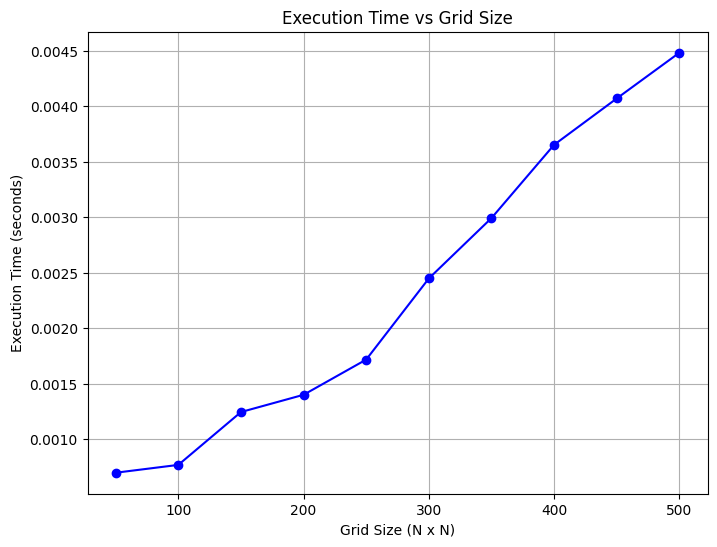

In [5]:
import subprocess
import matplotlib.pyplot as plt

def run_program(grid_size):
    command = ["python", "conway_perf.py", "--grid-size", str(grid_size)]
    
    result = subprocess.run(command, capture_output=True, text=True)
    return result.stdout, result.stderr


iteration = 5
grid_sizes = range(100, 1001, 100)
execution_times = []
for size in grid_sizes:
    tempt_times = []
    for i in range(iteration):
        stdout, stderr = run_program(size)
        if stderr:
            print("Error:", stderr)
        else:
            time_taken = float(stdout.strip().split()[-1])  # Assuming last output is execution time
            print(f"Grid size: {size}x{size}, Execution time: {time_taken:.6f} seconds")
            tempt_times.append(time_taken)
    execution_times.append(sum(tempt_times) / iteration)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(grid_sizes, execution_times, marker='o', linestyle='-', color='b')
plt.xlabel("Grid Size (N x N)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs Grid Size")
plt.grid(True)
plt.show()